### Goal

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing text.

### Dataset

Details about the data and dataset files are given in below link,
https://drive.google.com/file/d/1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)



In [8]:
tickets_df = pd.read_excel('../datasets/Input_data.xlsx')
print(tickets_df.shape)
tickets_df.head()

(8500, 4)


,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


###  EDA

In [9]:
tickets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [10]:
(tickets_df.isna() == True).sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [11]:
#tickets_df = tickets_df.astype(str)
convert_dict = {
    'Short description':str,
    'Description':str,
    'Caller':str,
    'Assignment group':str,
}
tickets_df = tickets_df.astype(convert_dict)

In [14]:
tickets_df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_67       1
GRP_64       1
GRP_61       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

### Findings: 
####  Dataset has 8500 Documents(records) and 4 features(columns). 74 uniqe labes. 8 Titles and 1 Description is null.
#### Dataset is highly imbalanced and skewed ! Around 46% of the dataset is represented by just one class GRP_0. There are many classes that hardly have 1 datapoint. We would need to upsample the under represented class and downsample the strongly represented classes.
####  We have 74 categories. There are few categories with very few tickets.  It might make sense to consider only those categories with atleast 20 representations. Else our noise levels will be high

In [15]:
tickets_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [17]:
# Total number of words in the corpus
tickets_df['RawDescription'] = tickets_df['Short description'].str.cat(tickets_df['Description'], sep=' ', na_rep=' ')
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [18]:
tickets_df['RawWordCount'] = [len(desc.split(' ')) for desc in tickets_df['RawDescription']]
tickets_df.head()
wordCount_before = tickets_df['RawWordCount'].sum()

In [19]:
print("Total Corpus Word Count: ", wordCount_before)

Total Corpus Word Count:  307607


In [20]:
tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6


### Visualization

#### Word Clould of "Short descrition" Column

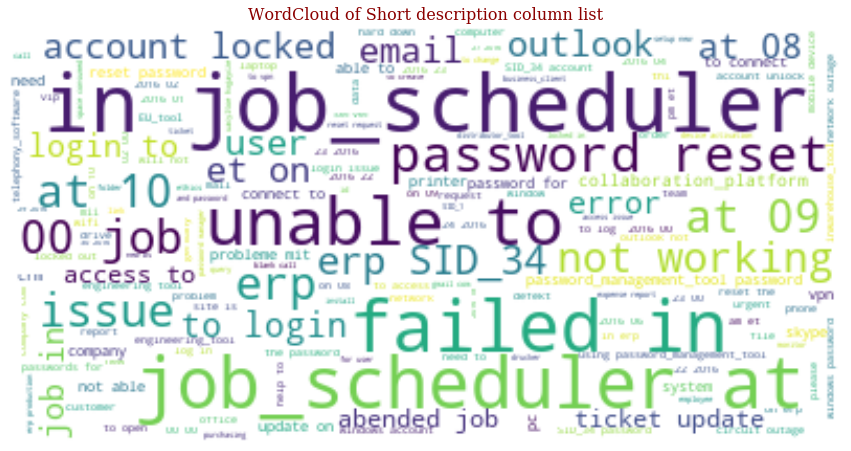

In [22]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

All_words = ""
All_words += " ".join(tickets_df['Short description'])
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column list", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Cloud of  raw "Description" Column

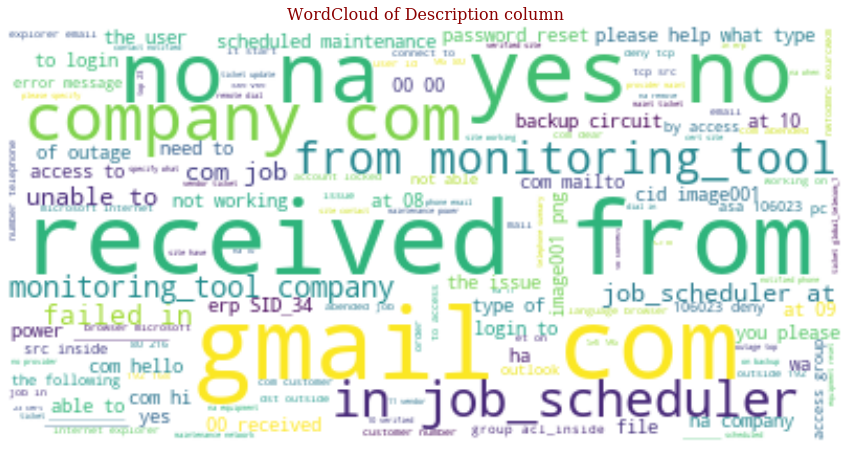

In [23]:
All_words = ""
All_words += " ".join(tickets_df.Description)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Description column", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word Cloud of complete raw data of the Corpus -  "RawDescription"

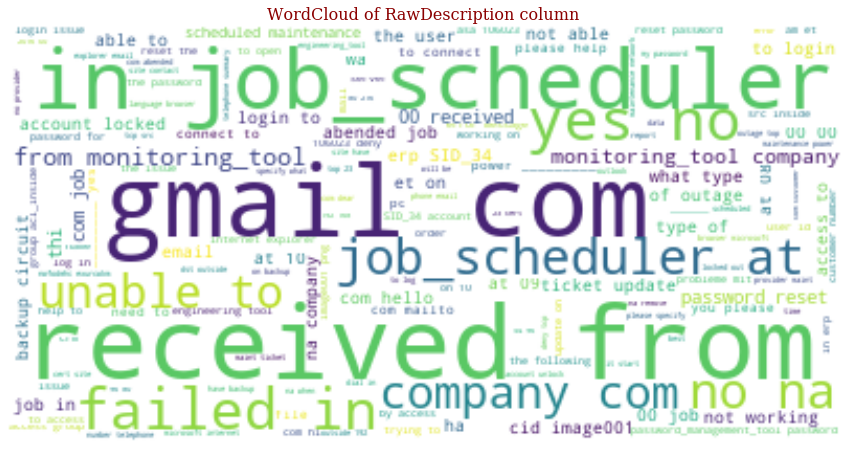

In [24]:
All_words = ""
All_words += " ".join(tickets_df.RawDescription)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of RawDescription column ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### WordCloud of Callers

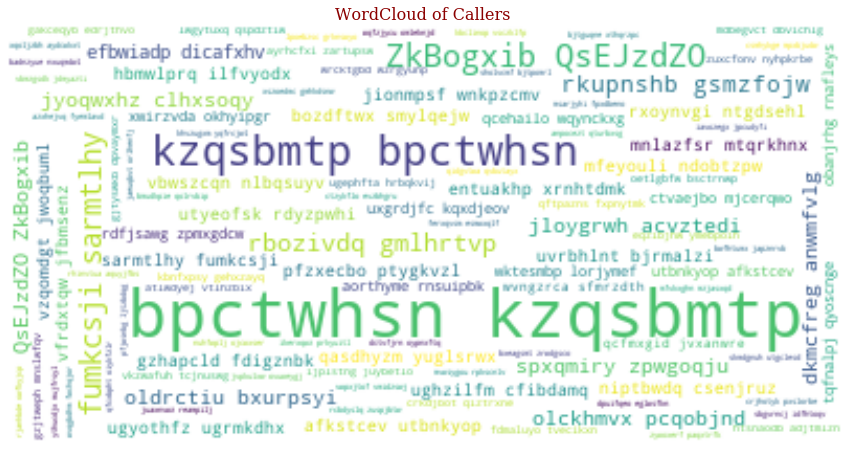

In [25]:
all_callers = ""
all_callers += " ".join(tickets_df.Caller)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(all_callers) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Callers ", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

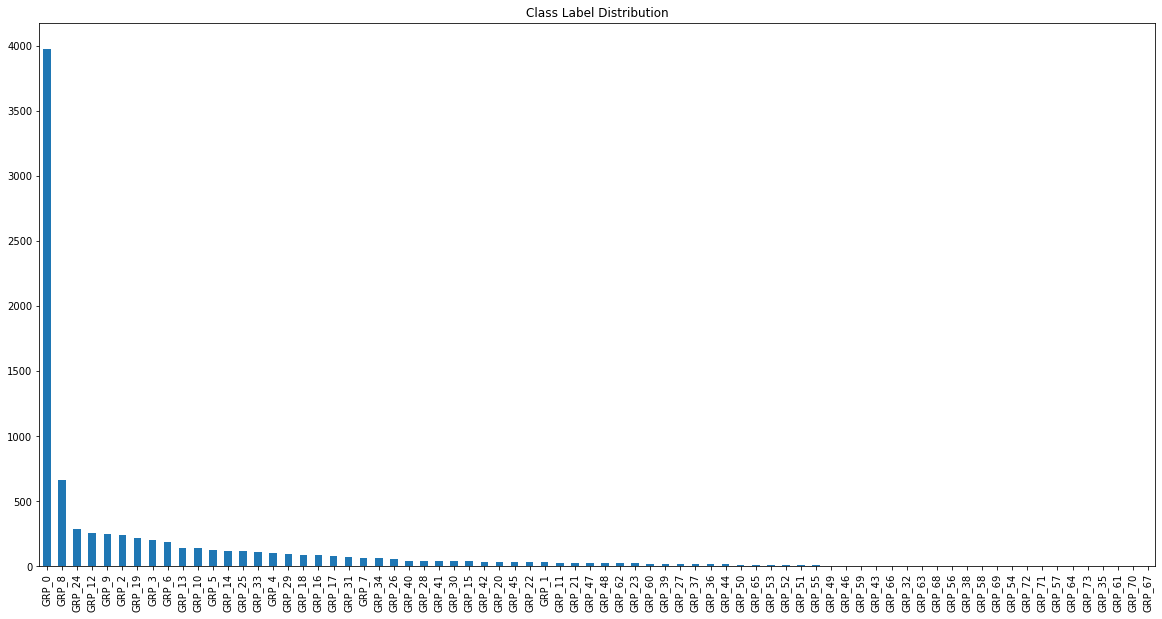

In [186]:
tickets_df['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

In [26]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

### Data Pre-Processing

In [94]:
def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [95]:
def cleanDataset(dataset, columnsToClean, regexList):
    for column in columnsToClean:
        for regex in regexList:
            dataset[column] = removeString(dataset[column], regex)
    return dataset

In [96]:
# TBD : remove Disclaimer

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList

#### Remove text with Regex

In [97]:
tickets_df['CleanDescription'] = tickets_df['RawDescription']
# Select columns for cleaning
columnsToClean = ['CleanDescription']

# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
clean_tickets_df = cleanDataset(tickets_df, columnsToClean, getRegexList())

In [31]:
clean_tickets_df.shape

(8500, 7)

In [32]:
clean_tickets_df.head(10)

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verified user details employee ma...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meetings skype meetings e...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log to vpn cannot log to vpn best
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log to engineering tool and skype unabl...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_221.company.com the v...,21,event critical hostname company com the value...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ent...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add ins outlook unable disable ...
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant


### NLP Essentials : Stopwords Removal & Text Normalization (Lemmetization)

#### Remove Stopwords

1. Text Classification
2. Spam Filtering
3. Language Classification
4. Genre Classification
5. Caption Generation
6. Auto-Tag Generation
 
#### Avoid Stopword Removal

1. Machine Translation
2. Language Modeling
3. Text Summarization
4. Question-Answering problems (Chatbots)

In [41]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
# We will not do stemming, instead use more intelligent way to get the root word using  lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prem.vishnoi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [42]:
stop_words = set(stopwords.words('english')) 

In [43]:
#nltk.download('wordnet')
!pip install wordnet

In [44]:
processed_all_documents = list()

for desc in clean_tickets_df['CleanDescription']:
    word_tokens = word_tokenize(desc) 
    
    filtered_sentence = [] 

    # Removing Stopwords
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    # Lemmetization
    lemma_word = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
        word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
        word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    processed_all_documents.append(words)    

In [45]:
len(processed_all_documents)

8500

In [46]:
clean_tickets_df['CleanDescription'] = processed_all_documents

In [47]:
clean_tickets_df['CleanWordCount'] = [len(desc.split(' ')) for desc in clean_tickets_df['CleanDescription']]

wordCount_after = clean_tickets_df['CleanWordCount'].sum()
print("Total Words After StopWords Removal & Lemmetization: ", wordCount_after)
print("Max word count of a Document: ", clean_tickets_df['CleanWordCount'].max())
print("Mean word count of Documents: ", clean_tickets_df['CleanWordCount'].mean())

Total Words After StopWords Removal & Lemmetization:  181210
Max word count of a Document:  876
Mean word count of Documents:  21.318823529411766


In [48]:
clean_tickets_df.head()

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription,CleanWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,24
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meet skype meet etc appear ...,15
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn log vpn best,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page,8
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error,4


In [49]:
print("Difference in Total WordCount Before & After Data Preprocessing: ", (wordCount_before - wordCount_after))

Difference in Total WordCount Before & After Data Preprocessing:  126397


### WordCloud of Cleaned Preprocessed Corpus Data

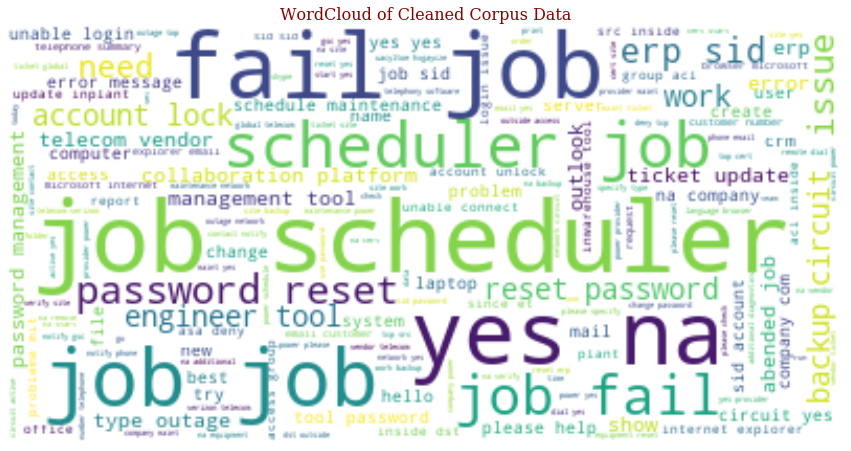

In [50]:
All_words = ""
All_words += " ".join(tickets_df.CleanDescription)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Class Imbalance

### Observation :  We have 74 labels for classification. There are few categories with very few tickets. It might make sense to consider only those categories with atleast 20 representations. Else our noise levels will be high

In [51]:
group_frequency = dict(clean_tickets_df['Assignment group'].value_counts())

In [52]:
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
GRP_0,3976,0.467765,0.467765
GRP_8,661,0.077765,0.545529
GRP_24,289,0.034000,0.579529
GRP_12,257,0.030235,0.609765
GRP_9,252,0.029647,0.639412
GRP_2,241,0.028353,0.667765
GRP_19,215,0.025294,0.693059
GRP_3,200,0.023529,0.716588
GRP_6,184,0.021647,0.738235
GRP_13,145,0.017059,0.755294


In [53]:
#for 95th percentile, 31 is our magic number 

group_frequency_filtered = dict(filter(lambda x: x[1] >= 31, group_frequency.items()))
print (group_frequency_filtered)

{'GRP_0': 3976, 'GRP_8': 661, 'GRP_24': 289, 'GRP_12': 257, 'GRP_9': 252, 'GRP_2': 241, 'GRP_19': 215, 'GRP_3': 200, 'GRP_6': 184, 'GRP_13': 145, 'GRP_10': 140, 'GRP_5': 129, 'GRP_14': 118, 'GRP_25': 116, 'GRP_33': 107, 'GRP_4': 100, 'GRP_29': 97, 'GRP_18': 88, 'GRP_16': 85, 'GRP_17': 81, 'GRP_31': 69, 'GRP_7': 68, 'GRP_34': 62, 'GRP_26': 56, 'GRP_40': 45, 'GRP_28': 44, 'GRP_41': 40, 'GRP_15': 39, 'GRP_30': 39, 'GRP_42': 37, 'GRP_20': 36, 'GRP_45': 35, 'GRP_22': 31, 'GRP_1': 31}


In [54]:
# Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)
# eliminate
clean_tickets_df = clean_tickets_df[clean_tickets_df['Assignment group'].isin(valid_grp_list)]
clean_tickets_df.head(10)

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription,CleanWordCount
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,24
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meet skype meet etc appear ...,15
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn log vpn best,6
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page,8
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error,4
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log engineer tool skype unable log engi...,10
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_221.company.com the v...,21,event critical hostname company com value moun...,27
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ente...,18
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add in outlook unable disable a...,10
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant,6


In [55]:
clean_tickets_df['Assignment group'].value_counts().sum()

8113

In [56]:
len(clean_tickets_df['Assignment group'].value_counts())

34

#### WordCloud of Cleaned & Class Balanced Corpus Data after dropping poorly represented classes

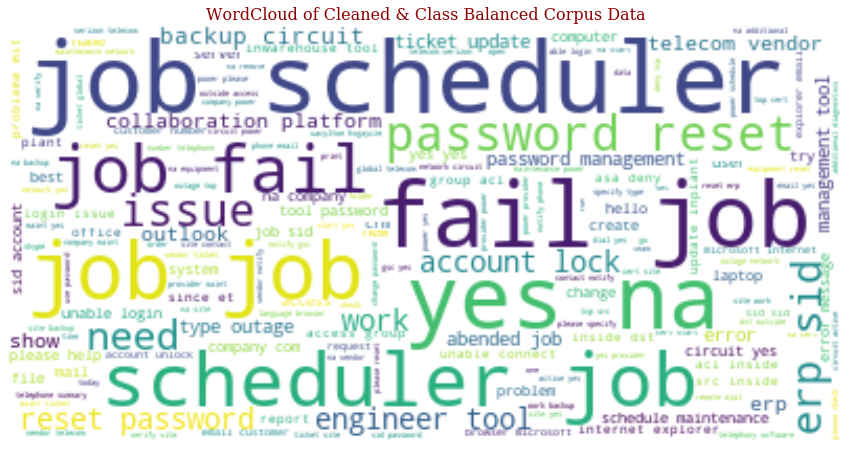

In [57]:
All_words = ""
All_words += " ".join(tickets_df.CleanDescription)
wordcloud = WordCloud(background_color='white', include_numbers=True).generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Cleaned & Class Balanced Corpus Data", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Observation
#### 1. Number of classes reduced from 74 to 34, rows corresponding to the weakly represented classes are dropped.
#### 2. Number of records reduced from 8500 to 8113


### Label Encode the Target Column

In [58]:
le = preprocessing.LabelEncoder()
clean_tickets_df["LabelEncodings"] = le.fit_transform(clean_tickets_df["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

34


/Users/prem.vishnoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
clean_tickets_df.head(10)

,Short description,Description,Caller,Assignment group,RawDescription,RawWordCount,CleanDescription,CleanWordCount,LabelEncodings
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,31,login issue verify user detail employee manage...,24,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24,outlook hello team meet skype meet etc appear ...,15,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,14,cant log vpn log vpn best,6,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,10,unable access tool page unable access tool page,8,0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,6,skype error skype error,4,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,18,unable log engineer tool skype unable log engi...,10,0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_221.company.com the v...,21,event critical hostname company com value moun...,27,1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...,18,ticket employment status new non employee ente...,18,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,14,unable disable add in outlook unable disable a...,10,0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...,8,ticket update inplant ticket update inplant,6,0


### Creating Tf-Idf vectors for ticket descriptions

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [61]:
y = np.asarray(clean_tickets_df['LabelEncodings'])

In [62]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(clean_tickets_df['CleanDescription'])
print(x_train_counts.shape)
#print(count_vect.vocabulary_)

(8113, 11350)


In [63]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
print(x_train_tfidf.shape)

(8113, 11350)


In [64]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [65]:
print(len(count_vect.vocabulary_))

11350


In [66]:
train_x.shape

(5679, 11350)

In [67]:
train_y.shape

(5679,)

In [68]:
test_x.shape

(2434, 11350)

In [69]:
test_y.shape

(2434,)

In [70]:
train_x[0]

<1x11350 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

###  Machine Learning Models

In [71]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)


Logistic Regression Score:  0.6561216105176664
Logistic Regression F1 Score:  0.6239859848575807


In [73]:
compare_results = compare_results.append({'Algorithm Name': 'Logistic Regression', 'Accuracy': acc_score,'F1 Score': f_sc}, ignore_index=True)

### Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Naive Bayes Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Score:  0.5780608052588332
Naive Bayes F1 Score:  0.6574778235565347


In [75]:
compare_results = compare_results.append({'Algorithm Name': 'Naive Bayes','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)

###  Support Vector Machine - Linear

In [76]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Score:  0.6873459326211997
SVM F1 Score:  0.6473671637861952


In [77]:
compare_results = compare_results.append({'Algorithm Name': 'Linear-SVM','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)

### Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(train_x, train_y)
model_entropy.score(train_x, train_y) # performance on train data - supposed to overfit

0.9529846804014791

In [79]:
model_entropy.score(test_x, test_y)  # performance on test data

0.6138044371405095

In [80]:
# Pruned Decision Trees
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(train_x, train_y)
preds_pruned = clf_pruned.predict(test_x)
preds_pruned_train = clf_pruned.predict(train_x)

In [81]:
acc_score = accuracy_score(test_y,preds_pruned)
print("Test results: ", acc_score)
print("Train results: ", accuracy_score(train_y,preds_pruned_train))

Test results:  0.561216105176664
Train results:  0.5735164641662265


In [82]:
f_sc = f1_score(test_y, preds_pruned, average='weighted', labels=np.unique(preds_pruned))
print("Decision Tree F1 Score: ", f_sc)

Decision Tree F1 Score:  0.6920162207546673


In [83]:
compare_results = compare_results.append({'Algorithm Name': 'Decision Trees','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)

###  Ensemble Techniques

### Random Forests

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(train_x, train_y)
pred_RF = rfcl.predict(test_x)
acc_RF = accuracy_score(test_y, pred_RF)
print(acc_RF)

0.6848808545603944


In [85]:
f_sc = f1_score(test_y, pred_RF, average='weighted', labels=np.unique(pred_RF))
print("Random F1 Score: ", f_sc)

Random F1 Score:  0.6382604755716439


In [86]:
compare_results = compare_results.append({'Algorithm Name': 'Random Forests','Accuracy':acc_RF, 'F1 Score': f_sc}, ignore_index=True)

### Boosting

In [87]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(train_x, train_y)
pred_AB =abcl.predict(test_x)
acc_AB = accuracy_score(test_y, pred_AB)

print("AdaBoost accuracy: ", acc_AB)

AdaBoost accuracy:  0.5509449465899754


In [88]:
f_sc = f1_score(test_y, pred_AB, average='weighted', labels=np.unique(pred_AB))
print("AdaBoosting Score: ", f_sc)

AdaBoosting Score:  0.5318851840444219


In [89]:
compare_results = compare_results.append({'Algorithm Name': 'AdaBoosting','Accuracy': acc_AB, 'F1 Score': f_sc}, ignore_index=True)

### Bagging

In [90]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=150, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(train_x, train_y)
pred_BG =bgcl.predict(test_x)
acc_BG = accuracy_score(test_y, pred_BG)
print(acc_BG)

0.6692686935086277


In [91]:
f_sc = f1_score(test_y, pred_BG, average='weighted', labels=np.unique(pred_BG))
print("Bagging Score: ", f_sc)

Bagging Score:  0.6365421971270934


In [92]:
compare_results = compare_results.append({'Algorithm Name': 'Bagging', 'Accuracy': acc_BG,  'F1 Score': f_sc}, ignore_index=True)

In [93]:
compare_results.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,F1 Score
2,Linear-SVM,0.687346,0.647367
4,Random Forests,0.684881,0.638260
6,Bagging,0.669269,0.636542
0,Logistic Regression,0.656122,0.623986
1,Naive Bayes,0.578061,0.657478
3,Decision Trees,0.561216,0.692016
5,AdaBoosting,0.550945,0.531885


#### Findings:
1. Linear SVM & Random Forest perform better than other algorithms. However, by doing a thorough hyperparameter tuning(using GridSearchCV), we can have a better insight. We should also consider, Decision Trees have highest F1 score.
2. Deep learning models should also be evaluated to further enhance the performance.